In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [2]:
transform = transforms.Compose([
    transforms.Resize((176,208)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAffine(10, shear=10, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(r'output\train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.ImageFolder(r'output\val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32)

test_dataset = datasets.ImageFolder(r'output\test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32)

In [3]:
device = torch.device('cuda:0') if torch.cuda.is_available() else "cpu"

In [4]:
device

device(type='cuda', index=0)

In [5]:
model = models.densenet201(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 4)  
)
model.to(device)

c:\Users\IIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\IIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████| 161/161 [00:57<00:00,  2.78it/s]


Epoch 1/50, Loss: 0.404345430942796
Validation Accuracy: 73.55242566510172%


100%|██████████| 161/161 [01:12<00:00,  2.23it/s]


Epoch 2/50, Loss: 0.39085123063244437
Validation Accuracy: 76.83881064162755%


100%|██████████| 161/161 [01:07<00:00,  2.38it/s]


Epoch 3/50, Loss: 0.36593465756925736
Validation Accuracy: 71.36150234741784%


100%|██████████| 161/161 [01:05<00:00,  2.45it/s]


Epoch 4/50, Loss: 0.3474318985335575
Validation Accuracy: 79.96870109546165%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 5/50, Loss: 0.33257559872006776
Validation Accuracy: 75.11737089201877%


100%|██████████| 161/161 [01:03<00:00,  2.53it/s]


Epoch 6/50, Loss: 0.3473890861554175
Validation Accuracy: 85.13302034428794%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 7/50, Loss: 0.31358478204433965
Validation Accuracy: 77.62128325508607%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 8/50, Loss: 0.32298310920133355
Validation Accuracy: 81.69014084507043%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 9/50, Loss: 0.3045908217752202
Validation Accuracy: 83.56807511737088%


100%|██████████| 161/161 [01:03<00:00,  2.53it/s]


Epoch 10/50, Loss: 0.2942440846229192
Validation Accuracy: 82.78560250391236%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 11/50, Loss: 0.286141298665023
Validation Accuracy: 87.32394366197182%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 12/50, Loss: 0.2759305568678038
Validation Accuracy: 82.78560250391236%


100%|██████████| 161/161 [01:04<00:00,  2.50it/s]


Epoch 13/50, Loss: 0.2577098519628092
Validation Accuracy: 74.80438184663537%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 14/50, Loss: 0.2695453410378154
Validation Accuracy: 85.91549295774648%


100%|██████████| 161/161 [01:05<00:00,  2.45it/s]


Epoch 15/50, Loss: 0.2775200322409224
Validation Accuracy: 85.60250391236308%


100%|██████████| 161/161 [01:04<00:00,  2.49it/s]


Epoch 16/50, Loss: 0.24528434629673543
Validation Accuracy: 84.50704225352112%


100%|██████████| 161/161 [01:04<00:00,  2.48it/s]


Epoch 17/50, Loss: 0.22150935167851654
Validation Accuracy: 82.62910798122066%


100%|██████████| 161/161 [01:04<00:00,  2.48it/s]


Epoch 18/50, Loss: 0.23666631772836544
Validation Accuracy: 82.31611893583725%


100%|██████████| 161/161 [01:04<00:00,  2.49it/s]


Epoch 19/50, Loss: 0.21263279068220106
Validation Accuracy: 80.12519561815337%


100%|██████████| 161/161 [01:05<00:00,  2.47it/s]


Epoch 20/50, Loss: 0.22916749540878378
Validation Accuracy: 87.94992175273866%


100%|██████████| 161/161 [01:05<00:00,  2.45it/s]


Epoch 21/50, Loss: 0.21141234029848013
Validation Accuracy: 86.697965571205%


100%|██████████| 161/161 [01:03<00:00,  2.53it/s]


Epoch 22/50, Loss: 0.2080757880456144
Validation Accuracy: 87.48043818466354%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 23/50, Loss: 0.21049664095506904
Validation Accuracy: 87.48043818466354%


100%|██████████| 161/161 [01:03<00:00,  2.53it/s]


Epoch 24/50, Loss: 0.19364523840200457
Validation Accuracy: 67.4491392801252%


100%|██████████| 161/161 [01:03<00:00,  2.54it/s]


Epoch 25/50, Loss: 0.26135292258229315
Validation Accuracy: 84.35054773082942%


100%|██████████| 161/161 [01:04<00:00,  2.48it/s]


Epoch 26/50, Loss: 0.17729980359721628
Validation Accuracy: 89.98435054773083%


100%|██████████| 161/161 [01:03<00:00,  2.54it/s]


Epoch 27/50, Loss: 0.1938854792265233
Validation Accuracy: 90.45383411580595%


100%|██████████| 161/161 [01:05<00:00,  2.46it/s]


Epoch 28/50, Loss: 0.19481623354396835
Validation Accuracy: 87.63693270735524%


100%|██████████| 161/161 [01:04<00:00,  2.49it/s]


Epoch 29/50, Loss: 0.18682662691481366
Validation Accuracy: 89.04538341158059%


100%|██████████| 161/161 [01:04<00:00,  2.50it/s]


Epoch 30/50, Loss: 0.1897119635264881
Validation Accuracy: 88.41940532081377%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 31/50, Loss: 0.18792260200456248
Validation Accuracy: 88.88888888888889%


100%|██████████| 161/161 [01:04<00:00,  2.48it/s]


Epoch 32/50, Loss: 0.1529930518789691
Validation Accuracy: 86.85446009389672%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 33/50, Loss: 0.210929891279673
Validation Accuracy: 85.13302034428794%


100%|██████████| 161/161 [01:04<00:00,  2.49it/s]


Epoch 34/50, Loss: 0.16010252389802326
Validation Accuracy: 88.41940532081377%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 35/50, Loss: 0.1686135384815265
Validation Accuracy: 90.76682316118936%


100%|██████████| 161/161 [01:03<00:00,  2.53it/s]


Epoch 36/50, Loss: 0.19078580405771361
Validation Accuracy: 88.88888888888889%


100%|██████████| 161/161 [01:03<00:00,  2.53it/s]


Epoch 37/50, Loss: 0.1657999580124428
Validation Accuracy: 84.19405320813772%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 38/50, Loss: 0.17983906954434348
Validation Accuracy: 89.67136150234741%


100%|██████████| 161/161 [01:04<00:00,  2.48it/s]


Epoch 39/50, Loss: 0.12736674004251727
Validation Accuracy: 94.5226917057903%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 40/50, Loss: 0.13695244680835594
Validation Accuracy: 91.8622848200313%


100%|██████████| 161/161 [01:04<00:00,  2.50it/s]


Epoch 41/50, Loss: 0.13980139781553183
Validation Accuracy: 93.27073552425665%


100%|██████████| 161/161 [01:04<00:00,  2.49it/s]


Epoch 42/50, Loss: 0.130445346832044
Validation Accuracy: 91.54929577464789%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 43/50, Loss: 0.17395209998864195
Validation Accuracy: 94.83568075117371%


100%|██████████| 161/161 [01:03<00:00,  2.55it/s]


Epoch 44/50, Loss: 0.13822606012155736
Validation Accuracy: 87.32394366197182%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 45/50, Loss: 0.1297981774272478
Validation Accuracy: 91.07981220657277%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 46/50, Loss: 0.1120278443172227
Validation Accuracy: 91.07981220657277%


100%|██████████| 161/161 [01:03<00:00,  2.52it/s]


Epoch 47/50, Loss: 0.12805207671528185
Validation Accuracy: 92.01877934272301%


100%|██████████| 161/161 [01:03<00:00,  2.55it/s]


Epoch 48/50, Loss: 0.11602115163996075
Validation Accuracy: 92.17527386541471%


100%|██████████| 161/161 [01:04<00:00,  2.48it/s]


Epoch 49/50, Loss: 0.10983620787050968
Validation Accuracy: 87.94992175273866%


100%|██████████| 161/161 [01:04<00:00,  2.51it/s]


Epoch 50/50, Loss: 0.1192670680542031
Validation Accuracy: 92.48826291079813%
Training finished.


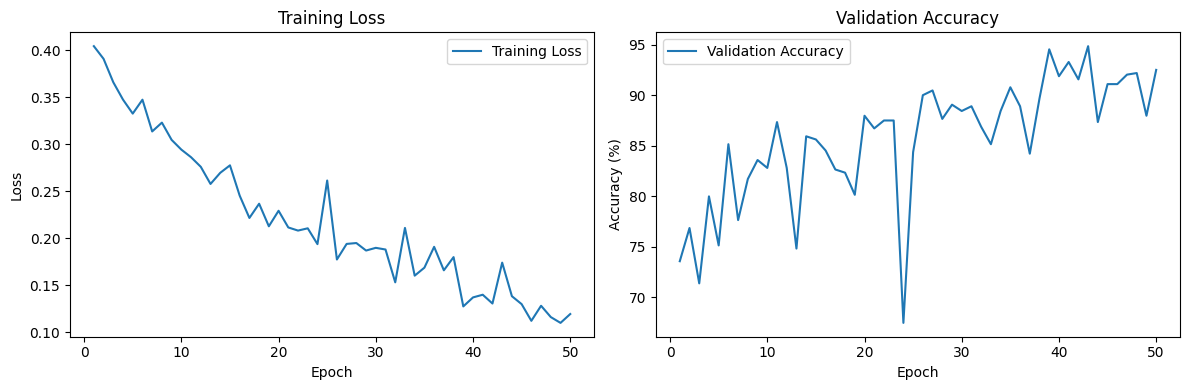

In [11]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

# Define your model, train_loader, val_loader, optimizer, and criterion

num_epochs = 50
train_losses = []  # To store training losses
val_accuracies = []  # To store validation accuracies

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    val_accuracy = correct / total * 100
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss}')
    print(f'Validation Accuracy: {val_accuracy}%')

print('Training finished.')

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.show()


In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
        # print(labels,predicted)

    print(f'Test Accuracy: {correct / total * 100}%')

100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

Test Accuracy: 94.20970266040689%


In [13]:
correct,total

(602, 639)

In [14]:
torch.save(model,'Alzheimer2densenet201.pt')